<!--COURSE_INFORMATION-->

*This notebook contains course material from [CBE 20255 Introduction to Chemical Engineering Analysis](http://jckantor.github.io/CBE20255/) 
by Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/CBE20255).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Operating Limits for a Methanol Lighter](07.03-Operating-Limits-for-a_\-Methanol-Lighter.ipynb) | [Contents](index.ipynb) | [Henry's Law Constants](07.05-Henry's-Law-Constants.ipynb) >
<p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/07.04-Raoult's-Law-for-Ideal-Mixtures.ipynb">
<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Raoult's Law for Ideal Mixtures

## Summary

This notebook illustrates the use of Raoult's Law to calculate vapor pressure, and compares the results to experimental data for a non-ideal system. The video is used with permission from [learnCheme.com](http://learncheme.ning.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

## Introduction

Thermally based chemical separations, such as distillation and flash units, [account for about 10 to 15 percent of the world's energy use](https://phys.org/news/2016-04-chemical-world.html). Raoult's law provides an idealized but nonetheless insightful understanding of how the vapor-liquid equilibrieum of mixtures is exploited for industrial separations. 

**Dalton's law**, in turn, says the total pressure $P$ is equal to the sum of the partial pressures, i.e.,

\begin{equation}
P = \sum_{n=1}^N p_n
\end{equation}


**Raoult's law** says the partial pressure $p_n$ of each component in a mixture of liquids is equal to the product of the mole fraction $x_n$ and the saturation pressure $P^{sat}_n(T)$ of the pure component. That is,

\begin{equation}
p_n = x_n P^{sat}_n(T)
\end{equation}

For an **ideal gas**, the partial pressure of an component in a mixture of gases is equal to the mole fraction $y_n$ and total pressure $P$

\begin{equation}
p_n = y_n P
\end{equation}

Subject to the assumptions of ideal liquid and gas mixtures, these three equations can be combined to provide a useful theory for vapor-liquid equilibrium and separations of ideal mixtures.

## Vapor Pressure of Pure Components

The calculations in this notebook are for a representative system of two components, [acetone and ethanol for which experimental data](http://www.ddbst.com/en/EED/VLE/VLE%20Acetone%3BEthanol.php) is available from the [Dortmund Data Bank](http://www.ddbst.com/ddbst.html). 

We start by creating two functions to estimate vapor pressure for the individual species using Antoine's equation.

In [ ]:
# Antoine's equations
A = 'acetone'
B = 'ethanol'

def PsatA(T):
    return 10**(7.02447 - 1161.0/(T + 224))

def PsatB(T):
    return 10**(8.04494 - 1554.3/(T + 222.65))

In particular, let's compute the saturation pressure at 32 $^\circ$C can compare to [experimental data](http://www.ddbst.com/en/EED/VLE/VLE%20Acetone%3BEthanol.php).

In [6]:
T = 32.0   # deg C

print('Saturation Pressure of', A, 'at', T, ' deg C =', round(PsatA(T),2), 'mmHg')
print('Saturation Pressure of', A, 'at', T, ' deg C =', round(PsatA(T)*101.325/760,2), 'kPa')

print()
print('Saturation Pressure of', B, 'at', T, ' deg C =', round(PsatB(T),2), 'mmHg')
print('Saturation Pressure of', B, 'at', T, ' deg C =', round(PsatB(T)*101.325/760,2), 'kPa')

NameError: ignored

Create plots for the vapor pressure of each component as a function of temperature.

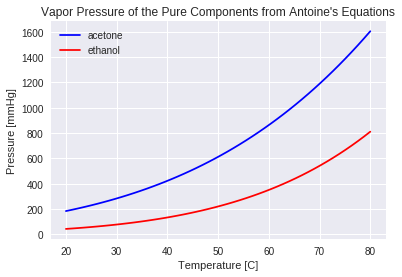

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot pure component vapor pressures
T = np.linspace(20,80)

plt.plot(T,PsatA(T),'b')
plt.plot(T,PsatB(T),'r')

plt.ylabel('Pressure [mmHg]')
plt.xlabel('Temperature [C]')
plt.legend([A,B],loc='best')
plt.title("Vapor Pressure of the Pure Components from Antoine's Equations");

**Things to Do / Things to Think About:**

1. What is the more volatile species?
2. Using this chart, estimate the normal boiling points of acetone and ethanol.
3. In the cell below, compute the normal boiling points using the function [`brentq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html) from [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/index.html) library. Compare your calculations to experimental data from a source that can trace back to the peer-reviewed literature.

In [5]:
from scipy.optimize import brentq

Patm = 760   # mmHg
Tlow = 20    # deg C
Thigh = 80   # deg C

TboilA = brentq(lambda T: PsatA(T) - Patm, Tlow, Thigh)
print('Normal boiling point of', A, '=', round(TboilA,2), 'deg C')
print('Normal boiling point of', A, '=', round(TboilA + 273.15,2), 'deg K')

print()
TboilB = brentq(lambda T: PsatB(T) - Patm, Tlow, Thigh)
print('Normal boiling point of', B, '=', round(TboilB,2), 'deg C')
print('Normal boiling point of', B, '=', round(TboilB + 273.15,2), 'deg K')

Normal boiling point of acetone = 56.19 deg C
Normal boiling point of acetone = 329.34 deg K

Normal boiling point of ethanol = 78.33 deg C
Normal boiling point of ethanol = 351.48 deg K


Boiling point data from the National Institute of Standards and Technology:

* [NIST acetone](https://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Units=SI&Mask=4#Thermo-Phase)
* [NIST ethanol](https://webbook.nist.gov/cgi/cbook.cgi?ID=C64175&Units=SI&Mask=4#Thermo-Phase)

## Vapor Pressure of an Acetone/Ethanol Mixture at a Fixed Temperature


For an ideal gas, the total vapor pressure of the liquid is equal to the sum of partial pressures,

$$P = \sum_{n=1}^N x_n P^{sat}_n(T) $$

The is explained in further detail in the following video for a two component mixture.



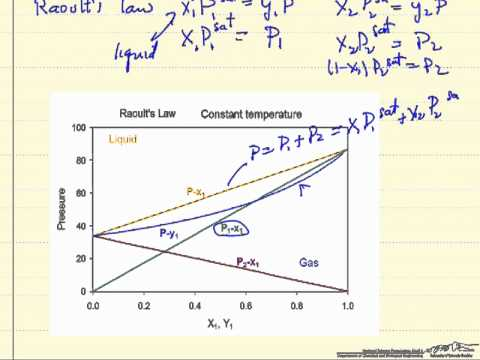

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('Adr9_2LnQdw') 

In this example we estimate the vapor pressure of an acetone/ethanol mixture using Raoult's law, assuming the vapor pressure of the component species are given by Antoine's equation. The estimate is compared to experimentally measured data.

For a binary mixture of $A$ and $B$, the total vapor pressure is a function of $T$ and $x_A$. 

\begin{equation}
P = x_{A} P^{sat}_{A}(T) + (1-x_{A})P^{sat}_{B}(T)
\end{equation}

The following cell shows a plot of the total vapor pressure $P$ as a function of $x_A$ for the case of an acetone ($A$) and ethanol ($B$) mixture. The component partial pressures

\begin{align*}
p_A & = x_A P^{sat}_A(T) \\
p_B & = (1-x_A) P^{sat}_B(T)
\end{align*}

are also shown. First run the cell manually. The cell should run automatically when the slider is adjusted.

In [5]:
#@title Use the slider to adjust temperature (deg C) {run: "auto"}
T = 61 #@param {type:"slider", min:20, max:80, step:1}

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1)

plt.figure(figsize=(8,6))
plt.plot(x, [x*PsatA(T) + (1-x)*PsatB(T) for x in x],'b')
plt.plot(x, [x*PsatA(T) for x in x],'r--')
plt.plot(x, [(1-x)*PsatB(T) for x in x],'g--')
plt.plot(0, PsatB(T), 'g.', ms=20)
plt.plot(1, PsatA(T), 'r.', ms=20)

plt.xlim(-0.01,1.01)
plt.ylim(0, 1200)
plt.xlabel('$x_A$ = Mole fraction ' + A, fontsize = 14)
plt.ylabel('Vapor Pressure / mmHg', fontsize = 14)
plt.title('Raoult\'s Law: ' + A + ' / ' + B + ' at {:.1f} deg C'.format(T), 
          fontsize = 16)
plt.legend(['Total Pressure: Raoult\'s Law','Vapor Pressure of Acetone',
            'Vapor Pressure of Ethanol']);

NameError: ignored

**Things to Do / Things to Think About:**

1. What is vapor pressure of a liquid mixture that is 50% ethanol at 32 deg C?
2. Note the point where the ethanol and acetone partial pressures intersect. What is the composition of the vapor phase at this point? What is the liquid phase composition? Why are they different?
3. Assuming you start with a cold liquid mixture that is 50% ethanol. By adjusting the temperature, estimate the point at which it starts boiling.

estimate the normal boiling point of a 50% liquid mixture of ethanol. Estimate the vapor phase composition at the normal boiling point.


## Comparing Raoult's Law to [Experimental Data](http://www.ddbst.com/en/EED/VLE/VLE%20Acetone%3BEthanol.php)

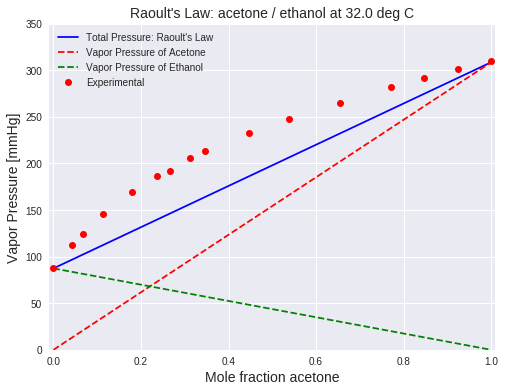

In [8]:
T = 32  # deg C

plt.figure(figsize=(8,6))
plt.plot(x, [x*PsatA(T) + (1-x)*PsatB(T) for x in x],'b')
plt.plot(x, [x*PsatA(T) for x in x],'r--')
plt.plot(x, [(1-x)*PsatB(T) for x in x],'g--')

# Experimental data of (P,x) observations
Px = np.array([\
    [11.679, 0.00000],\
    [14.999, 0.04220],\
    [16.585, 0.06730],\
    [19.358, 0.11300],\
    [22.571, 0.17870],\
    [24.811, 0.23610],\
    [25.585, 0.26650],\
    [27.384, 0.31280],\
    [28.371, 0.34700],\
    [31.037, 0.44580],\
    [33.037, 0.53720],\
    [35.370, 0.65480],\
    [37.584, 0.77210],\
    [38.890, 0.84740],\
    [40.130, 0.92520],\
    [41.317, 1.00000]])

# Convert kPa to mmHg
P = Px.T[0]*760/101.3

# Convert K to C
T = 305.15 - 273.15

# Extract measured composition
x = Px.T[1]

# Overlay plot of experimental data and label$$ 
plt.plot(x,P,'ro')
plt.xlim(-0.01, 1.01)
plt.ylim(0, 350)
plt.xlabel('Mole fraction ' + A, fontsize = 14)
plt.ylabel('Vapor Pressure [mmHg]', fontsize = 14)
plt.title('Raoult\'s Law: ' + A + ' / ' + B + ' at {:.1f} deg C'.format(T), 
          fontsize = 14)
plt.legend(['Total Pressure: Raoult\'s Law',
            'Vapor Pressure of Acetone',
            'Vapor Pressure of Ethanol',
            'Experimental']);

**Things to Do / Things to Think About:**

1. Does a real liquid mixture of ethanol and acetone boil at a higher or lower temperature than predicted by Raoult's law?

## Deviations from Raoult's Law

Raoult's law works for ideal mixtures and ideal gases. Given a prediction from Raoult's law, the actual vapor pressure may be higher (**a positive deviation**) or lower (**a negative deviation**).  If the deviations are sufficiently large then an **azeotrope** may form.

![](https://upload.wikimedia.org/wikipedia/commons/d/dc/RaoultDeviationPressureDiagram.png)

**Things to Do / Things to Think About:**

1. In this sketch, what is the more volatile species?
2. Sketch in the vapor phase partial pressures corresponding to Raoult's law. How do you expect these to change for a mixture with a negative deviation from Raoult's law? 
3. Does a negative deviation azeotrope boil at a higher or lower temperature than a mixture that follows Raoult's law?

<!--NAVIGATION-->
< [Operating Limits for a Methanol Lighter](07.03-Operating-Limits-for-a_\-Methanol-Lighter.ipynb) | [Contents](index.ipynb) | [Henry's Law Constants](07.05-Henry's-Law-Constants.ipynb) >
<p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/07.04-Raoult's-Law-for-Ideal-Mixtures.ipynb">
<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>
